{'nu': 0.001, 'gamma': 0.1, 'kernel': 'rbf', 'tol': 0.001, 'fpr': 0.3058599534588534, 'falsenegative_c': 431001, 'falsepositive_c': 250, 'falsepositive_bf': 14208, 'bfsize': 135009.5, 'size': 6777130752, 'nsv': 124096}
{'nu': 0.001, 'gamma': 0.1, 'kernel': 'rbf', 'tol': 0.01, 'fpr': 0.30742542839009945, 'falsenegative_c': 615934, 'falsepositive_c': 224, 'falsepositive_bf': 14308, 'bfsize': 192937.75, 'size': 1043034588, 'nsv': 19099}
{'nu': 0.001, 'gamma': 0.1, 'kernel': 'rbf', 'tol': 0.1, 'fpr': 0.3061772794584303, 'falsenegative_c': 789979, 'falsepositive_c': 187, 'falsepositive_bf': 14286, 'bfsize': 247454.5, 'size': 171590904, 'nsv': 3142}
{'nu': 0.001, 'gamma': 0.1, 'kernel': 'rbf', 'tol': 1.0, 'fpr': 0.3015020097313307, 'falsenegative_c': 832734, 'falsepositive_c': 138, 'falsepositive_bf': 14114, 'bfsize': 260847.75, 'size': 46474812, 'nsv': 851}
{'nu': 0.001, 'gamma': 10.0, 'kernel': 'rbf', 'tol': 0.001, 'fpr': 0.3053945419928073, 'falsenegative_c': 815192, 'falsepositive_c': 0,

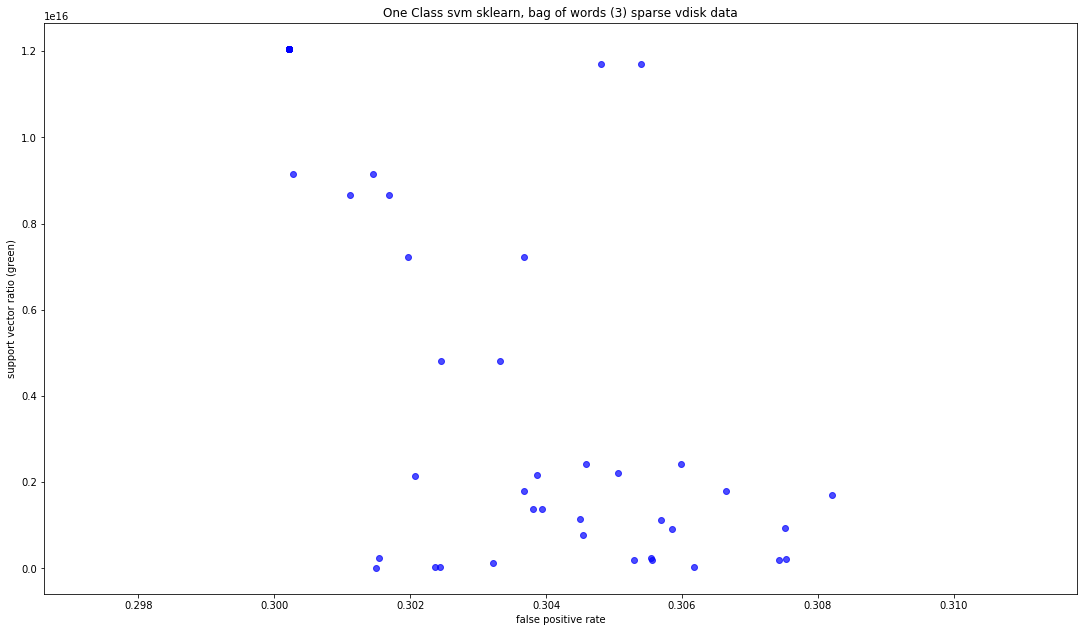

In [16]:
import pickle as pkl
import matplotlib.pyplot as plt
%matplotlib inline
ssTableData = {}
separator = ":"
# namePrefix = sys.argv[3]
namePrefix = "svmsimplebagofword5"
# namePrefix = "epsilonbagofword8"
namePrefixOri = namePrefix


takesample = False

# typedata = sys.argv[1]
typedata = "vdisk"
if typedata=="vdisk":
    import vdiskHelper as dataHelper
# typemodel = sys.argv[2]
typemodel = "svmsimple"
# typemodel = "epsilon"
if typemodel=="epsilon":
    import epsilonHelper as modelHelper
elif typemodel=="svmsimple":
    import svmsklearncoreHelper as modelHelper
elif typemodel=="libsvmsch":
    import svmlibsvmHelper as modelHelper
elif typemodel=="isolationforest":
    print("isolationforest loaded")
    import isolationForestHelper as modelHelper
    
f = open("Observations/compiledobs_"+namePrefix+".pkl","rb")
wholejson = pkl.load(f)
f.close()
fprs = []
sizes = []
bfsizes = []
nsv = []
nus = []
gammas = []
tols = []

for i in wholejson["data"]:
    if i["fpr"] >0.31:
        continue
#     if i["nsv"]*1.0/839364 > 0.17:
#         continue
    fprs.append(i["fpr"])
    sizes.append(i["size"])
    bfsizes.append(i["bfsize"])
#     nsv.append(i["nsv"]*1.0/839364)
#     nus.append(i["nu"])
#     gammas.append(i["gamma"])
#     tols.append(i["tol"])
    print(i)
# print(x, y)
# print(sizes)
fig, ax1 = plt.subplots()
fig.set_size_inches(18.5, 10.5)
# plt.scatter(fprs,nsv, color='green', alpha=0.7)
# for i in range(len(fprs)):
#     plt.annotate("nu:"+str(nus[i])+" gamma: "+str(gammas[i])+" tol: "+str(tols[i]), xy=(fprs[i],nsv[i]))
# for i in range(len(fprs)):
#     plt.annotate("nu:"+str(nus[i])+" gamma: "+str(gammas[i])+" tol: "+str(tols[i]), xy=(fprs[i],nsv[i]))
ax1.set_ylabel("support vector ratio (green)")
# ax2 = ax1.twinx() 
sizesMultBfsizes = []
for i in range(len(bfsizes)):
    sizesMultBfsizes.append(bfsizes[i] * sizes[i])
print(sizesMultBfsizes)
plt.scatter(fprs,sizesMultBfsizes, color='blue', alpha=0.7)
# for i in range(len(fprs)):
#     plt.plot([fprs[i], fprs[i]], [nsv[i],bfsizes[i]], 'ro-')
# ax2.set_ylabel("bloom filter sizes (blue)")
# plt.scatter(fprs,nsv)
ax1.set_xlabel("false positive rate")
# plt.ylabel("size")
# plt.vlines(x=[0.3], ymin=min(y), ymax=max(y), color ='red')
plt.title('One Class svm sklearn, bag of words (3) sparse vdisk data')
plt.show()

In [13]:
wholejson

{'data': [{'nu': 0.001,
   'gamma': 0.1,
   'kernel': 'rbf',
   'tol': 0.001,
   'fpr': 0.3058599534588534,
   'falsenegative_c': 431001,
   'falsepositive_c': 250,
   'falsepositive_bf': 14208,
   'bfsize': 135009.5,
   'size': 6777130752,
   'nsv': 124096},
  {'nu': 0.001,
   'gamma': 0.1,
   'kernel': 'rbf',
   'tol': 0.01,
   'fpr': 0.30742542839009945,
   'falsenegative_c': 615934,
   'falsepositive_c': 224,
   'falsepositive_bf': 14308,
   'bfsize': 192937.75,
   'size': 1043034588,
   'nsv': 19099},
  {'nu': 0.001,
   'gamma': 0.1,
   'kernel': 'rbf',
   'tol': 0.1,
   'fpr': 0.3061772794584303,
   'falsenegative_c': 789979,
   'falsepositive_c': 187,
   'falsepositive_bf': 14286,
   'bfsize': 247454.5,
   'size': 171590904,
   'nsv': 3142},
  {'nu': 0.001,
   'gamma': 0.1,
   'kernel': 'rbf',
   'tol': 1.0,
   'fpr': 0.3015020097313307,
   'falsenegative_c': 832734,
   'falsepositive_c': 138,
   'falsepositive_bf': 14114,
   'bfsize': 260847.75,
   'size': 46474812,
   'nsv': 8

In [19]:
sizesMultBfsizescopy = sizesMultBfsizes.copy()
sizesMultBfsizescopy.sort()
print(sizesMultBfsizescopy)

[12122850141873.0, 24080123580858.0, 24080123580858.0, 42460941353868.0, 114991436407716.0, 192158802396450.0, 192161735060850.0, 201240746580897.0, 215252172509517.0, 238763618672040.0, 238970196535392.0, 769276791525636.0, 914977034262144.0, 941384748124800.0, 1124312375674512.0, 1151113628060046.0, 1384492482206100.0, 1384607186247240.0, 1700001710637615.0, 1784540066007600.0, 1791247886499573.0, 2142676284302592.0, 2161541262932100.0, 2209323222081162.0, 2411390296567332.0, 2411688252321324.0, 4821141836487708.0, 4821279354528012.0, 7230664179674244.0, 7230916296081468.0, 8672666890465296.0, 8672666890465296.0, 9151837042067892.0, 9151837042067892.0, 1.1705226175085796e+16, 1.1705226175085796e+16, 1.2052275869466324e+16, 1.2052275869466324e+16, 1.2052275869466324e+16, 1.2052275869466324e+16, 1.2052275869466324e+16, 1.2052275869466324e+16, 1.2052275869466324e+16, 1.2052275869466324e+16, 1.2052275869466324e+16, 1.2052275869466324e+16, 1.2052275869466324e+16, 1.2052275869466324e+16]


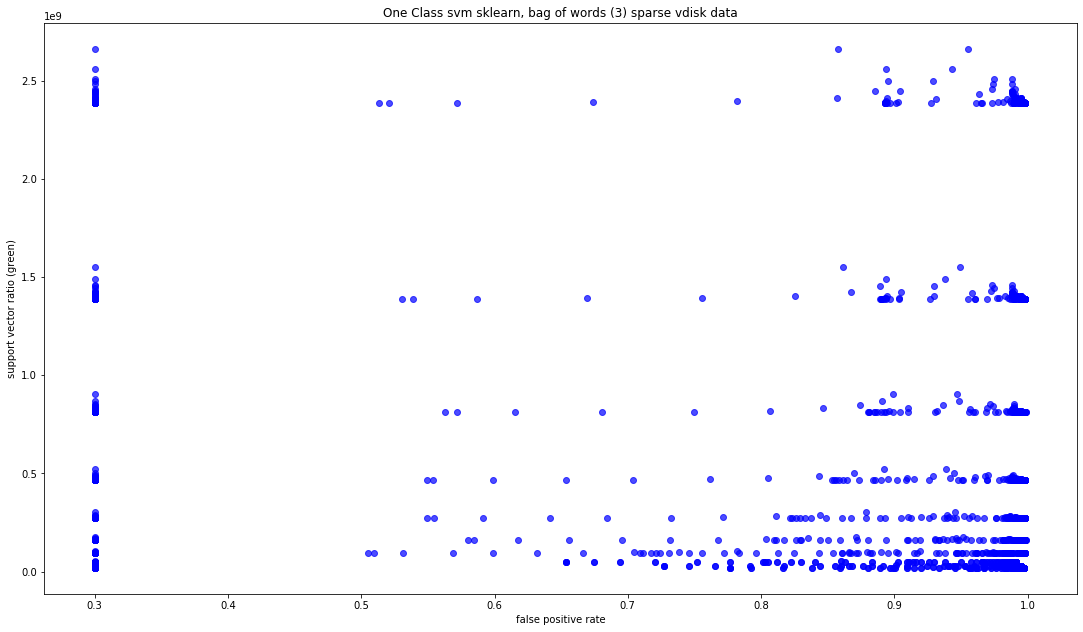

In [10]:
import pickle as pkl
import matplotlib.pyplot as plt
%matplotlib inline
ssTableData = {}
separator = ":"
# namePrefix = sys.argv[3]
# namePrefix = "svmsimplebagofword5"
namePrefix = "epsilonbagofword8"
namePrefixOri = namePrefix


takesample = False

# typedata = sys.argv[1]
typedata = "vdisk"
if typedata=="vdisk":
    import vdiskHelper as dataHelper
# typemodel = sys.argv[2]
# typemodel = "svmsimple"
typemodel = "epsilon"
if typemodel=="epsilon":
    import epsilonHelper as modelHelper
elif typemodel=="svmsimple":
    import svmsklearncoreHelper as modelHelper
elif typemodel=="libsvmsch":
    import svmlibsvmHelper as modelHelper
elif typemodel=="isolationforest":
    print("isolationforest loaded")
    import isolationForestHelper as modelHelper
    
f = open("Observations/compiledobs_"+namePrefix+".pkl","rb")
wholejson = pkl.load(f)
f.close()
fprs = []
sizes = []
bfsizes = []
nsv = []
nus = []
gammas = []
tols = []
Ds = []
epsilons = []
agg_thrs = []
box_thrs = []

for i in wholejson["data"]:
#     if i["fpr"] >0.31:
#         continue
#     if i["nsv"]*1.0/839364 > 0.17:
#         continue
    fprs.append(i["fpr"])
    sizes.append(i["size"])
    bfsizes.append(i["bfsize"])
#     nsv.append(i["nsv"]*1.0/839364)
#     nus.append(i["nu"])
#     gammas.append(i["gamma"])
#     tols.append(i["tol"])
    Ds.append(i["D"])
    epsilons.append(i["epsilon"])
    agg_thrs.append(i["agg_thr"])
    box_thrs.append(i["box_thr"])
#     print(i)
# print(x, y)
# print(sizes)
fig, ax1 = plt.subplots()
fig.set_size_inches(18.5, 10.5)
# plt.scatter(fprs,nsv, color='green', alpha=0.7)
# for i in range(len(fprs)):
#     plt.annotate("nu:"+str(nus[i])+" gamma: "+str(gammas[i])+" tol: "+str(tols[i]), xy=(fprs[i],nsv[i]))
# for i in range(len(fprs)):
#     plt.annotate("D:"+str(Ds[i])+" epsilon: "+str(epsilons[i])+" agg_thr: "+str(agg_thrs[i])+" box_thr: "+str(box_thrs[i]), xy=(fprs[i],bfsizes[i]))
ax1.set_ylabel("support vector ratio (green)")
# ax2 = ax1.twinx() 
plt.scatter(fprs,sizes, color='blue', alpha=0.7)
# for i in range(len(fprs)):
#     plt.plot([fprs[i], fprs[i]], [nsv[i],bfsizes[i]], 'ro-')
# ax2.set_ylabel("bloom filter sizes (blue)")
# plt.scatter(fprs,nsv)
ax1.set_xlabel("false positive rate")
# plt.ylabel("size")
# plt.vlines(x=[0.3], ymin=min(y), ymax=max(y), color ='red')
plt.title('One Class svm sklearn, bag of words (3) sparse vdisk data')
plt.show()

In [94]:
(max(bfsizes), min(bfsizes))

(262771.75, 135009.5)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
# np.random.seed(19680801)

# the random data
print(x)
print(y)
print("dfsf")



# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(8, 8))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
ax_scatter.scatter(x, y)

# now determine nice limits by hand:
binwidth = 0.25
lim = np.ceil(np.abs([x, y]).max() / binwidth) * binwidth
ax_scatter.set_xlim((-lim, lim))
ax_scatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
ax_histx.hist(x, bins=bins)
ax_histy.hist(y, bins=bins, orientation='horizontal')

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

plt.show()

NameError: name 'x' is not defined

[-4.25 -4.   -3.75 -3.5  -3.25 -3.   -2.75 -2.5  -2.25 -2.   -1.75 -1.5
 -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5
  1.75  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75  4.    4.25]


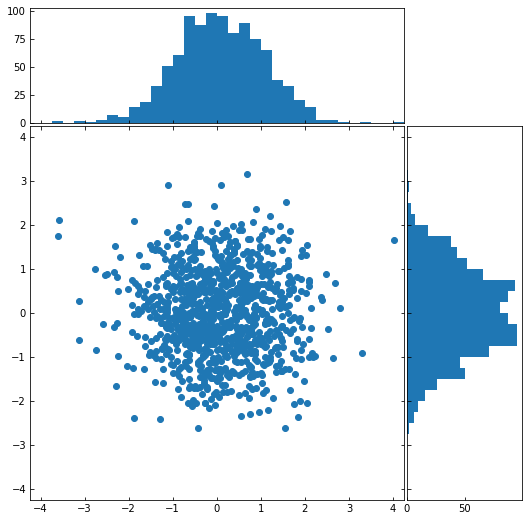

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

# the random data
x = np.random.randn(1000)
y = np.random.randn(1000)

# print(x)
# print(y)
# print("dfsf")

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(8, 8))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
ax_scatter.scatter(x, y)

# now determine nice limits by hand:
binwidth = 0.25
lim = np.ceil(np.abs([x, y]).max() / binwidth) * binwidth
ax_scatter.set_xlim((-lim, lim))
ax_scatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
print(bins)
ax_histx.hist(x, bins=bins)
ax_histy.hist(y, bins=bins, orientation='horizontal')

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

plt.show()

In [ ]:
min(x)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)

x = np.random.rand(15)
y = np.random.rand(15)
names = np.array(list("ABCDEFGHIJKLMNO"))
c = np.random.randint(1,5,size=15)

norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn

fig,ax = plt.subplots()
sc = plt.scatter(x,y,c=c, s=100, cmap=cmap, norm=norm)

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(ind):

    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))), 
                           " ".join([names[n] for n in ind["ind"]]))
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.4)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()

In [ ]:
wholejson
